# 1 EDA (Exploratory Data Analysis)

## 1.1 EDA data description
### Visualization of data relationships, data types, null and NaN values, duplicates, and unique values present in each column, along with descriptive insights.
### Obs.: The **orders** table has the column **dias_since_prior_order**, which is documented with the name **dias_since_prior** in the task pdf, it will be considered the official name present in the table and not in the .pdf doc

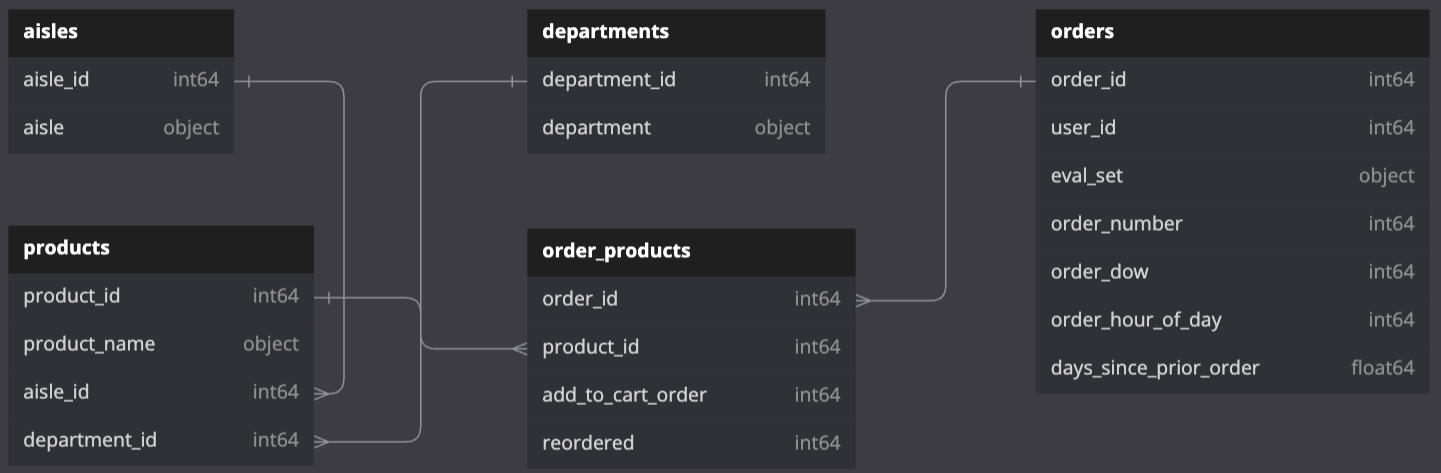

In [47]:
from IPython.display import display, Image
path_img = '/Users/marcobispo/Documents/Bees-Data-Challenge/data_schema.png'
display(Image(filename=path_img))

In [48]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
def read_multiple_csv(file_paths, names):
    if len(file_paths) != len(names):
        raise ValueError("The length of file_paths and names must be the same.")
    dataframes = {}
    for file_path, name in zip(file_paths, names):
        dataframes[name] = pd.read_csv(file_path)
    return dataframes
file_path = '/Users/marcobispo/Documents/Bees-Data-Challenge/Data-Challenge-V/online-shopping-dataset/'
file_paths = [file_path+'aisles.csv',
                file_path+'departments.csv',
                file_path+'order_products.csv',
                file_path+'orders.csv',
                file_path+'products.csv']
names = ['aisles', 'departments', 'order_products','orders','products']
dfs = read_multiple_csv(file_paths, names)
import pandas as pd
dict_quality_data = {
    'df_name': [],
    'column_name': [],
    'column_type': [],
    'NaN': [],
    'null': [],
    'duplicates':[],
    'uniques':[],
    'size':[],
    'describe':[]
}
dict_describe = {
    'aisles':{
        'aisle_id':'Uniquely identifies each aisle',
        'aisle':'Contains the name of the aisle'
    },
    'departments':{
        'department_id': 'Provides a unique identifier for each department',
        'department': 'Displays the name of the department'
    },
    'order_products':{
        'order_id':'Serves as a foreign key, linking to the unique order identifier',
        'product_id':'Functions as a foreign key, connecting to the unique product identifier',
        'add_to_cart_order': 'Reflects the order in which each product was added to the shopping cart',
        'reordered': 'Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not'
    },
    'orders':{
        'order_id': 'Uniquely identifies each order',
        'user_id': 'Identifies the customer associated with the order',
        'eval_set': 'Denotes the category to which this order belongs (refer to the SET descriptions below)',
        'order_number': "Represents the sequence number of the order for a user, where 1'denotes the first order and 'n' indicates the nth order",
        'order_dow': 'Indicates the day of the week when the order was placed',
        'order_hour_of_day': 'Specifies the hour at which the order was initiated',
        'days_since_prior_order': "Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order)"
        #days_since_prior:
    },
    'products':{
        'product_id': 'Serves as a unique identifier for each product',
        'product_name': 'Provides the name of the product',
        'aisle_id': 'Acts as a reference key for the aisle associated with the product',
        'department_id': 'Acts as a reference key for the department in which the product belongs'
    }
}
for name_df, df in dfs.items():
    for col in df.columns:
        series = df[col]
        n_nan = series.isna().sum()
        n_null = series.isnull().sum()
        duplicates = series.duplicated().sum()
        uniques = series.nunique()
        size = len(series)
        dict_quality_data['df_name'].append(name_df)
        dict_quality_data['column_name'].append(col)
        dict_quality_data['column_type'].append(series.dtype)
        dict_quality_data['NaN'].append(n_nan)
        dict_quality_data['null'].append(n_null)
        dict_quality_data['duplicates'].append(duplicates)
        dict_quality_data['uniques'].append(uniques)
        dict_quality_data['size'].append(size)
        dict_quality_data['describe'].append(dict_describe[name_df][col])
df_quality_data = pd.DataFrame(dict_quality_data)
display(df_quality_data)

,df_name,column_name,column_type,NaN,null,duplicates,uniques,size,describe
0,aisles,aisle_id,int64,0,0,0,134,134,Uniquely identifies each aisle
1,aisles,aisle,object,0,0,0,134,134,Contains the name of the aisle
2,departments,department_id,int64,0,0,0,21,21,Provides a unique identifier for each department
3,departments,department,object,0,0,0,21,21,Displays the name of the department
4,order_products,order_id,int64,0,0,30473023,3346083,33819106,"Serves as a foreign key, linking to the unique order identifier"
5,order_products,product_id,int64,0,0,33769421,49685,33819106,"Functions as a foreign key, connecting to the unique product identifier"
6,order_products,add_to_cart_order,int64,0,0,33818961,145,33819106,Reflects the order in which each product was added to the shopping cart
7,order_products,reordered,int64,0,0,33819104,2,33819106,"Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not"
8,orders,order_id,int64,0,0,0,3346083,3346083,Uniquely identifies each order
9,orders,user_id,int64,0,0,3139874,206209,3346083,Identifies the customer associated with the order


In [49]:
for name_df, df in dfs.items():
    print(name_df)
    display(df.head(2))

aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


departments


,department_id,department
0,1,frozen
1,2,other


order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


## 1.2 EDA data check
### Quick check to verify if the data descriptions match what is actually present in the dataframe otherwise, cleaning will be necessary.
### The description perfectly matches the data being analyzed however, the count of days of the week is starting from zero, for hours it makes sense, but for days not so much, but 7 values ​​are present within the list

In [74]:
reordered = dfs['order_products']['reordered'].unique().tolist()
reordered.sort()
print(reordered)

[0, 1]


In [75]:
order_number = dfs['orders']['order_number'].unique().tolist()
order_number.sort()
print(order_number)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [76]:
order_dow = dfs['orders']['order_dow'].unique().tolist()
order_dow.sort()
print(order_dow)

[0, 1, 2, 3, 4, 5, 6]


In [77]:
order_hour_of_day = dfs['orders']['order_hour_of_day'].unique().tolist()
order_hour_of_day.sort()
print(order_hour_of_day)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [78]:
days_since_prior_order = dfs['orders']['days_since_prior_order'].unique().tolist()
days_since_prior_order.sort()
print(days_since_prior_order)

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


## 1.3 Data Visualization:
### Which product had the biggest sales and withdrawals?
### Which aisle had the biggest sales and withdrawals?
### Which department had the highest sales and withdrawals?
### Which days of the week sell the most?
### Which days of the month sell the most?
### Which hours sell the most?

# Statistical analysis

# Modeling (machine learning)